In [1]:
import time
import os, sys
sys.path.append(os.path.abspath('../../..'))

import matplotlib.pyplot as plt
import Code.pyMMF.pyMMF as new
import pyMMF as old
import numpy as np

In [2]:
npoints = 2 ** 8
wl = 0.632

# fiber
NA = 0.27
n1 = 1.472

perf_data = {old: {'name': 'wavefrontshaping/pyMMF.git'}, 
             new: {'name': 'vongostev/pyMMF.git'}}

radiuses = range(5, 25) #um

In [3]:
for pyMMF in [new, old]:
    perf_data[pyMMF]['modes'] = []
    perf_data[pyMMF]['times'] = []
    perf_data[pyMMF]['profiles'] = []
    for radius in radiuses:
        area_size = 3.5 * radius
        # Create the fiber object
        profile = pyMMF.IndexProfile(npoints=npoints, areaSize=area_size)
        # Initialize the index profile
        profile.initStepIndex(n1=n1, a=radius, NA=NA)
        # Instantiate the solver
        solver = pyMMF.propagationModeSolver()
        # Set the profile to the solver
        solver.setIndexProfile(profile)
        # Set the wavelength
        solver.setWL(wl)
        t = time.time()
        modes_semianalytical = solver.solve(
            mode='SI', curvature=None, n_jobs=-1)
        t = time.time() - t
        perf_data[pyMMF]['modes'].append(modes_semianalytical.number)
        perf_data[pyMMF]['times'].append(t)
        perf_data[pyMMF]['profiles'].append(modes_semianalytical.profiles)

2021-06-30 18:39:45,180 - Code.pyMMF [DEBUG  ]  Debug mode ON.
2021-06-30 18:39:45,181 - Code.pyMMF [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
C:\Users\vonGostev\OneDrive\Code\pyMMF\pyMMF\solvers\SI.py:86: RuntimeWarning: invalid value encountered in sqrt
  w=np.sqrt(v**2-u**2)
2021-06-30 18:39:45,493 - Code.pyMMF [INFO   ]  Found 49 modes is 0.31 seconds.
2021-06-30 18:39:45,494 - Code.pyMMF [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2021-06-30 18:39:50,563 - Code.pyMMF [DEBUG  ]  Mode data stored in memory.
2021-06-30 18:39:50,603 - Code.pyMMF [DEBUG  ]  Debug mode ON.
2021-06-30 18:39:50,604 - Code.pyMMF [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2021-06-30 18:39:50,972 - Code.pyMMF [INFO   ]  Found 67 modes is 0.37 seconds.
2021-06-30 18:39:50,972 - Code.pyMMF [INFO   ]  Finding analytical LP mode prof

2021-06-30 18:42:11,321 - Code.pyMMF [DEBUG  ]  Debug mode ON.
2021-06-30 18:42:11,322 - Code.pyMMF [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2021-06-30 18:42:13,241 - Code.pyMMF [INFO   ]  Found 800 modes is 1.92 seconds.
2021-06-30 18:42:13,241 - Code.pyMMF [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2021-06-30 18:42:37,369 - Code.pyMMF [DEBUG  ]  Mode data stored in memory.
2021-06-30 18:42:37,411 - Code.pyMMF [DEBUG  ]  Debug mode ON.
2021-06-30 18:42:37,412 - Code.pyMMF [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2021-06-30 18:42:39,439 - Code.pyMMF [INFO   ]  Found 877 modes is 2.03 seconds.
2021-06-30 18:42:39,439 - Code.pyMMF [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2021-06-30 18:43:07,722 - Code.pyMMF [DEBUG  ]  Mode data stored in memory.
2021-06-30 1

2021-06-30 18:49:18,894 - pyMMF.core [DEBUG  ]  Debug mode ON.
2021-06-30 18:49:18,895 - pyMMF.solv [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2021-06-30 18:49:20,335 - pyMMF.solv [INFO   ]  Found 525 modes is 1.44 seconds.
2021-06-30 18:49:20,335 - pyMMF.solv [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2021-06-30 18:50:20,954 - pyMMF.core [DEBUG  ]  Mode data stored in memory.
2021-06-30 18:50:20,988 - pyMMF.core [DEBUG  ]  Debug mode ON.
2021-06-30 18:50:20,989 - pyMMF.solv [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2021-06-30 18:50:22,562 - pyMMF.solv [INFO   ]  Found 588 modes is 1.57 seconds.
2021-06-30 18:50:22,562 - pyMMF.solv [INFO   ]  Finding analytical LP mode profiles associated to the propagation constants.
2021-06-30 18:51:32,568 - pyMMF.core [DEBUG  ]  Mode data stored in memory.
2021-06-30 1

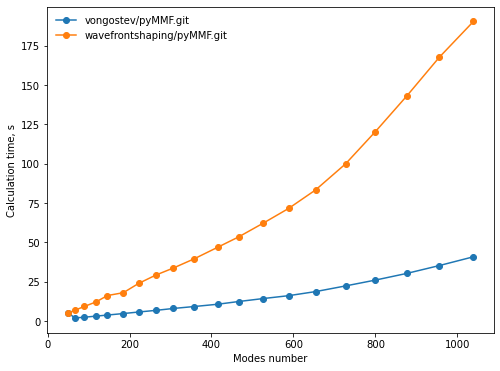

In [4]:
plt.subplots(1, 1, figsize=(8,6))
for pyMMF in [new, old]:
    plt.plot(perf_data[pyMMF]['modes'], perf_data[pyMMF]['times'], 'o-',
             label=perf_data[pyMMF]['name'])
plt.legend(frameon=False)
plt.ylabel('Calculation time, s')
plt.xlabel('Modes number')
plt.show()

In [6]:
for i in range(len(perf_data[old]['profiles'])):
    oldp = perf_data[old]['profiles'][i]
    newp = perf_data[new]['profiles'][i]
    pn = len(oldp)
    print(i + 5, 'um', 'Profiles match:', 
          np.sum([np.allclose(newp[k], oldp[k]) for k in range(pn)]),
          'of', pn)

5 um Profiles match: 49 of 49
6 um Profiles match: 67 of 67
7 um Profiles match: 90 of 90
8 um Profiles match: 119 of 119
9 um Profiles match: 146 of 146
10 um Profiles match: 185 of 185
11 um Profiles match: 222 of 222
12 um Profiles match: 264 of 264
13 um Profiles match: 307 of 307
14 um Profiles match: 358 of 358
15 um Profiles match: 415 of 415
16 um Profiles match: 466 of 466
17 um Profiles match: 525 of 525
18 um Profiles match: 588 of 588
19 um Profiles match: 654 of 654
20 um Profiles match: 727 of 727
21 um Profiles match: 800 of 800
22 um Profiles match: 877 of 877
23 um Profiles match: 956 of 956
24 um Profiles match: 1039 of 1039
